# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
url

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amga
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | bereeda
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | weno
Processing Record 8 of Set 1 | ashburton
Processing Record 9 of Set 1 | bay roberts
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | ploneour-lanvern
Processing Record 14 of Set 1 | cambria
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | zaoyang
Processing Record 18 of Set 1 | happy valley-goose bay
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | bom jardim
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | tidjikja
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amga,60.8953,131.9608,-0.62,84,82,1.26,RU,1715537580
1,college,64.8569,-147.8028,9.18,49,75,1.54,US,1715537580
2,bethel,41.3712,-73.4140,14.00,70,100,0.45,US,1715537331
3,bereeda,11.8704,51.0579,30.41,65,47,3.83,SO,1715537581
4,port-aux-francais,-49.3500,70.2167,3.16,86,96,15.08,TF,1715537581


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amga,60.8953,131.9608,-0.62,84,82,1.26,RU,1715537580
1,college,64.8569,-147.8028,9.18,49,75,1.54,US,1715537580
2,bethel,41.3712,-73.4140,14.00,70,100,0.45,US,1715537331
3,bereeda,11.8704,51.0579,30.41,65,47,3.83,SO,1715537581
4,port-aux-francais,-49.3500,70.2167,3.16,86,96,15.08,TF,1715537581


In [8]:
# Convert 'Date' column
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amga,60.8953,131.9608,-0.62,84,82,1.26,RU,2024-05-12
1,college,64.8569,-147.8028,9.18,49,75,1.54,US,2024-05-12
2,bethel,41.3712,-73.4140,14.00,70,100,0.45,US,2024-05-12
3,bereeda,11.8704,51.0579,30.41,65,47,3.83,SO,2024-05-12
4,port-aux-francais,-49.3500,70.2167,3.16,86,96,15.08,TF,2024-05-12


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

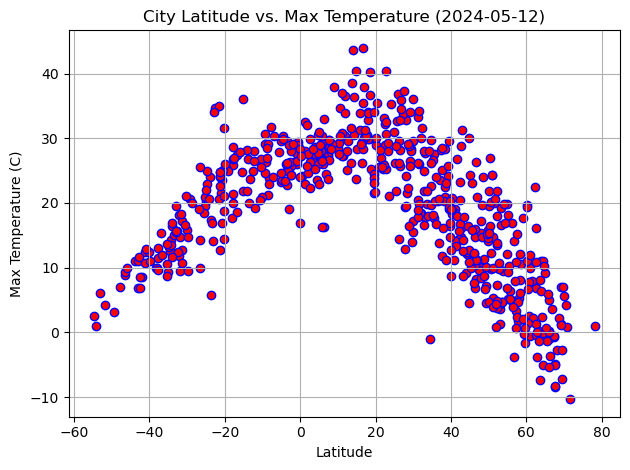

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='r', edgecolors='b')

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.tight_layout()
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

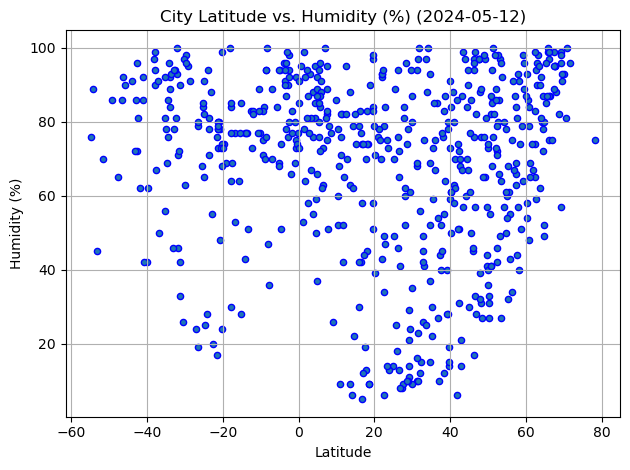

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o',
                  facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

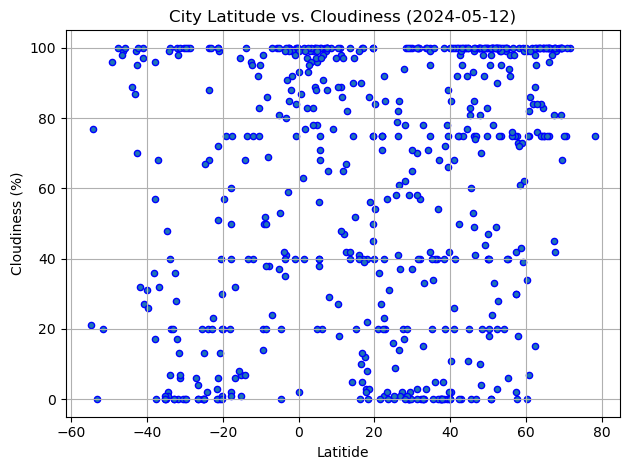

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o',
                  facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitide')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

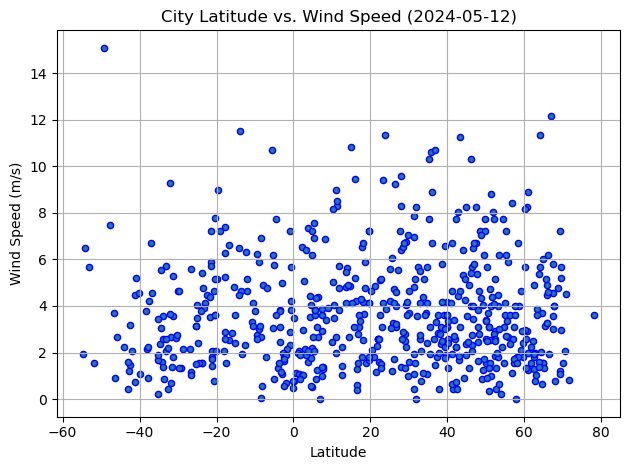

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o',
                  facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def lr_func(x, y, name, vbl, hemi):
    (slope, intercept, rval, pval, stde)= linregress(x,y)
    reg_vals= x * slope + intercept
    plt.plot(x, reg_vals, color='b')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq= f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'linear equation: {line_eq}')
    plt.savefig(f'../output_data/LinearRegresion_{name}.png')
    print(f'r-value: {rval}')

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amga,60.8953,131.9608,-0.62,84,82,1.26,RU,2024-05-12
1,college,64.8569,-147.8028,9.18,49,75,1.54,US,2024-05-12
2,bethel,41.3712,-73.4140,14.00,70,100,0.45,US,2024-05-12
3,bereeda,11.8704,51.0579,30.41,65,47,3.83,SO,2024-05-12
6,weno,7.4515,151.8468,28.97,89,100,3.60,FM,2024-05-12


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,3.16,86,96,15.08,TF,2024-05-12
5,grytviken,-54.2811,-36.5092,1.01,89,77,6.49,GS,2024-05-12
7,ashburton,-37.8626,145.0794,12.99,90,96,0.89,AU,2024-05-12
9,fale old settlement,-9.3852,-171.2468,29.14,75,98,6.24,TK,2024-05-12
11,ancud,-41.8697,-73.8203,8.59,62,32,2.08,CL,2024-05-12


###  Temperature vs. Latitude Linear Regression Plot

linear equation: y = -0.46x + 35.54
r-value: -0.8126851383971893


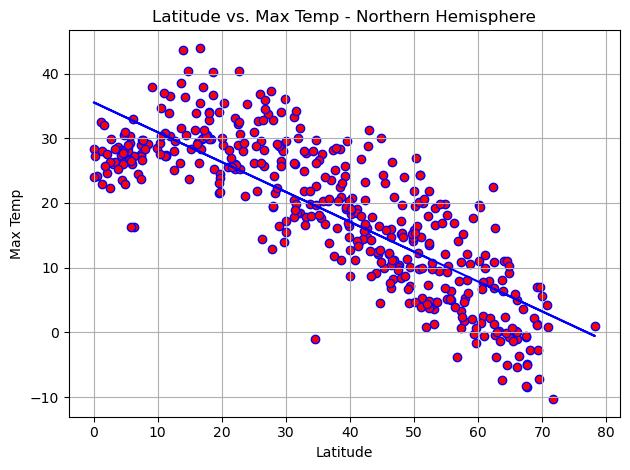

In [24]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o',
            facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.tight_layout()
plt.grid()

# Linear Regression
x= northern_hemi_df['Lat']
y= northern_hemi_df['Max Temp']
name= 'NH_Lat_Vs_Max_Temp'
vbl= 'Max Temp'
hemi = 'Northern Hemisphere'
lr_func(x, y, name, vbl, hemi)

plt.show()

linear equation: y = 0.44x + 29.7
r-value: 0.8227909919071078


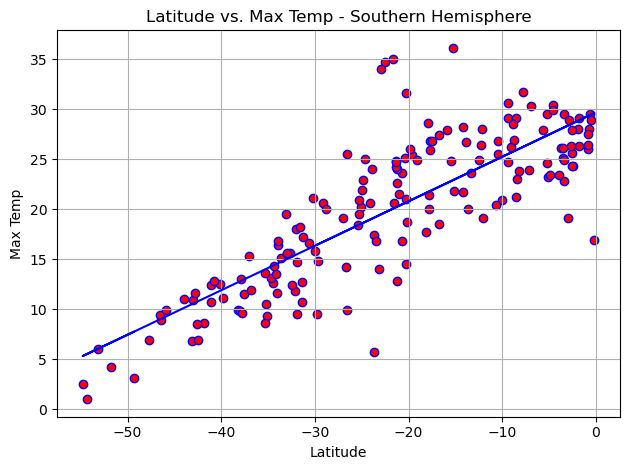

In [28]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o',
            facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.tight_layout()
plt.grid()

# Linear Regression
x= southern_hemi_df['Lat']
y= southern_hemi_df['Max Temp']
name= 'SH_Lat_Vs_Max_Temp'
vbl= 'Max Temp'
hemi = 'Southern Hemisphere'
lr_func(x, y, name, vbl, hemi)

plt.show()

**Discussion about the linear relationship:**
Based on the data, it does appear that there is a strong correlation between the latitude and the max temperature. In the northern hemisphere you can see that as latitude moves further from 0 the temperature tends to decrease. While in the southern hemisphere, you can see the temperature tend to increase as the latitude moves closer to 0

### Humidity vs. Latitude Linear Regression Plot

linear equation: y = 0.18x + 59.47
r-value: 0.13472052927016667


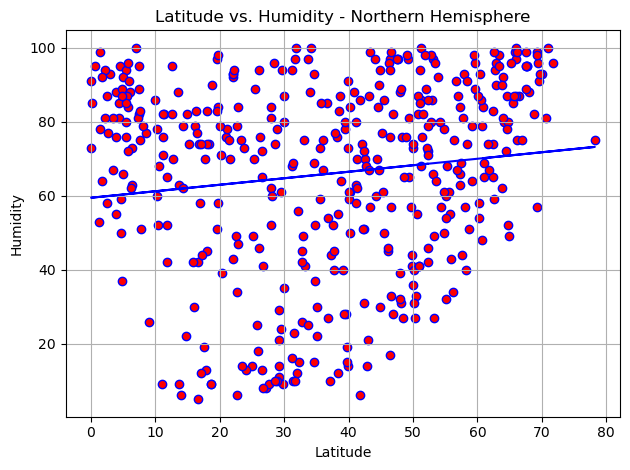

In [29]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o',
            facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.grid()

# Linear Regression
x= northern_hemi_df['Lat']
y= northern_hemi_df['Humidity']
name= 'NH_Lat_Vs_Humidity'
vbl= 'Humidity'
hemi = 'Northern Hemisphere'
lr_func(x, y, name, vbl, hemi)

plt.show()

linear equation: y = 0.07x + 76.66
r-value: 0.05052344824106249


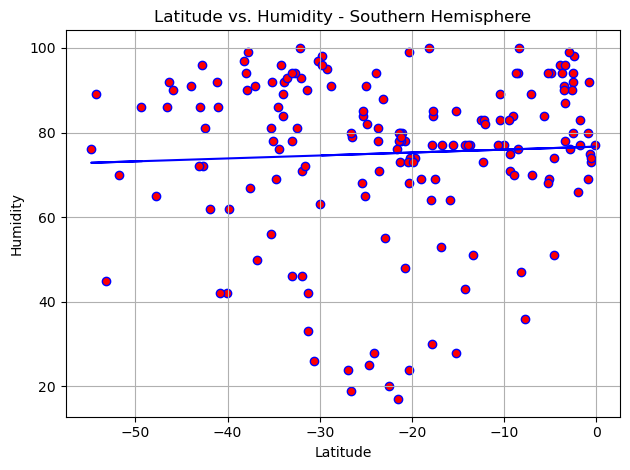

In [30]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o',
            facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.grid()

# Linear Regression
x= southern_hemi_df['Lat']
y= southern_hemi_df['Humidity']
name= 'SH_Lat_Vs_Humidity'
vbl= 'Humidity'
hemi = 'Southern Hemisphere'
lr_func(x, y, name, vbl, hemi)

plt.show()

**Discussion about the linear relationship:**
A very weak correlation between latitude and humidity. Both northern and southern hemisphere show a slightly positive correlation but the points within are so spread out to show that the latitude has any affect on the humiduty percentage.

### Cloudiness vs. Latitude Linear Regression Plot

linear equation: y = 0.25x + 54.82
r-value: 0.1345165159057954


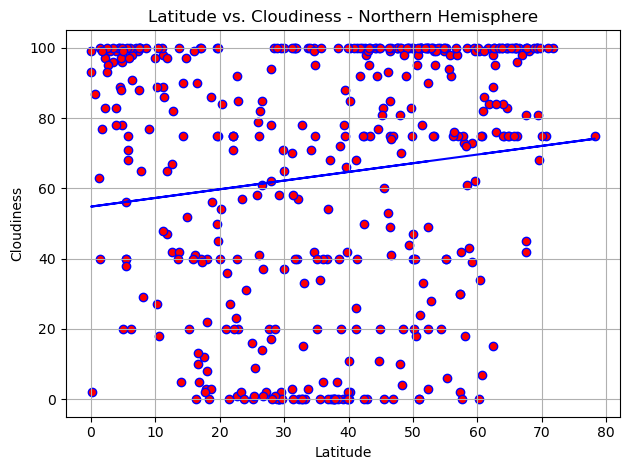

In [31]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o',
            facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.grid()

# Linear Regression
x= northern_hemi_df['Lat']
y= northern_hemi_df['Cloudiness']
name= 'NH_Lat_Vs_Cloudiness'
vbl= 'Cloudiness'
hemi = 'Northern Hemisphere'
lr_func(x, y, name, vbl, hemi)

plt.show()

linear equation: y = 0.5x + 61.39
r-value: 0.17963306544158694


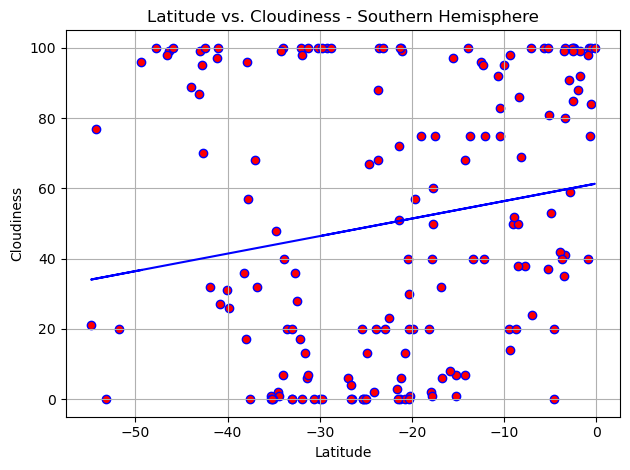

In [32]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o',
            facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.grid()

# Linear Regression
x= southern_hemi_df['Lat']
y= southern_hemi_df['Cloudiness']
name= 'SH_Lat_Vs_Cloudiness'
vbl= 'Cloudiness'
hemi = 'Southern Hemisphere'
lr_func(x, y, name, vbl, hemi)

plt.show()

**Discussion about the linear relationship:** 
Similar to Humidity, there is a weak correlation between latitide and cloudiness. In both the northern and southern hemisphere the correlation is positive but very low and to distant to show that latitude can affect cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

linear equation: y = 0.0x + 3.73
r-value: 5.338947341144863e-05


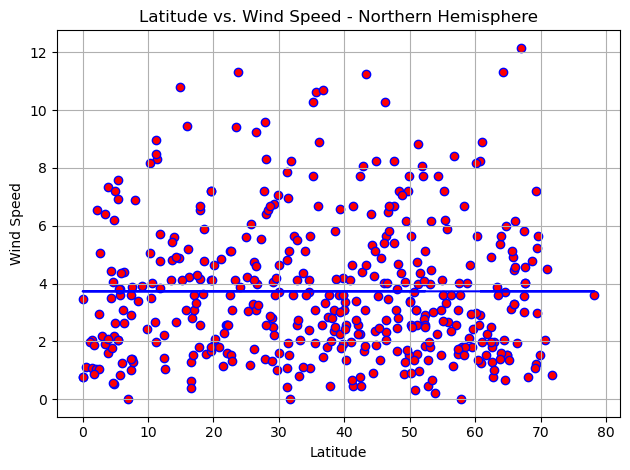

In [33]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o',
            facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.grid()

# Linear Regression
x= northern_hemi_df['Lat']
y= northern_hemi_df['Wind Speed']
name= 'NH_Lat_Vs_Wind_Speed'
vbl= 'Wind Speed'
hemi = 'Northern Hemisphere'
lr_func(x, y, name, vbl, hemi)

plt.show()

linear equation: y = 0.01x + 3.61
r-value: 0.03283978571897044


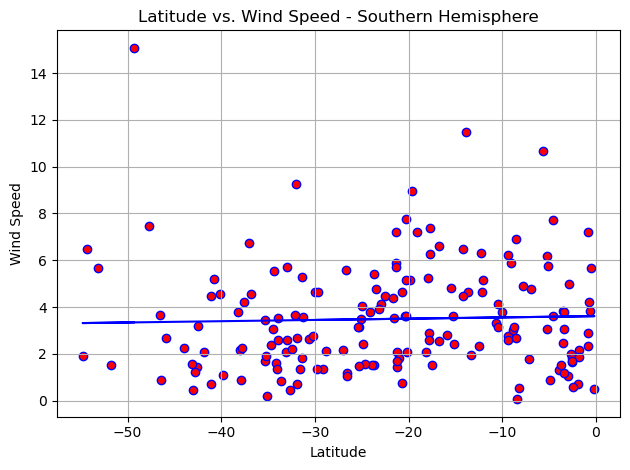

In [34]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o',
            facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.grid()

# Linear Regression
x= southern_hemi_df['Lat']
y= southern_hemi_df['Wind Speed']
name= 'SH_Lat_Vs_Wind_Speed'
vbl= 'Wind Speed'
hemi = 'Southern Hemisphere'
lr_func(x, y, name, vbl, hemi)

plt.show()

**Discussion about the linear relationship:** Based on the data, the correlation between latitude and wind speed is very weak. Data Points are too spread out and the r-value is too low to show a good correlation between the two